# Map static fields for p125 model 

In [15]:
# Stephen.Griffies@noaa.gov 

In [16]:
import matplotlib.pyplot as plt
#import matplotlib.ticker as mticker
import numpy as np
import netCDF4
import cmocean
import xarray as xr
import cartopy.crs as ccrs
import mplsettings

#import cartopy.crs as ccrs
#from cartopy.mpl.gridliner import LONGITUDE_FORMATTER, LATITUDE_FORMATTER
%matplotlib inline

In [17]:
#dirstix = "/net2/rnd/dev/stixfonts/fonts/static_ttf"
dirstix = "../../common/static_ttf"

import matplotlib.font_manager as font_manager
for font in font_manager.findSystemFonts(dirstix):
    font_manager.fontManager.addfont(font)

# Set font family globally
plt.rcParams['font.family'] = 'STIX Two Text'

In [18]:
# static file 
fname_static = "../../common/CM4X_p125/ocean_annual.static.nc"
#fname_static = "/net/smg/OWG/CM4_highres/grids/p125/ocean_annual.static.nc"
static = xr.open_mfdataset(fname_static)
static = static.assign_coords({'geolon': static['geolon'], 'geolat': static['geolat']})

deptho = static['deptho']
mask   = deptho/deptho
hfgeou = static['hfgeou'] * mask 
areao  = static['areacello'] * mask 

hfgeou.load()
deptho.load()

geo_area = areao * hfgeou
geo_ave  = geo_area.sum(dim=['yh','xh']).values/areao.sum(dim=['yh','xh']).values
print('area averaged geothermal heat flux (W/m2) = ',geo_ave)


area averaged geothermal heat flux (W/m2) =  0.09465441


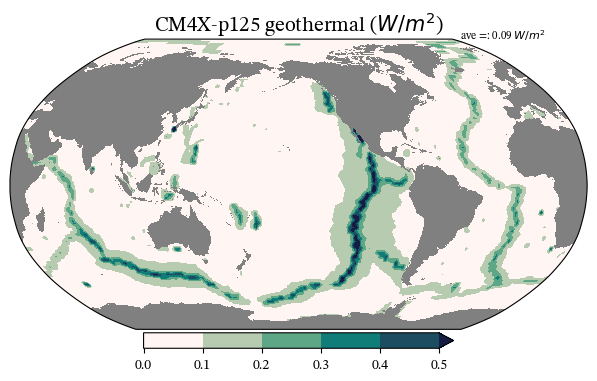

In [19]:
#MOM geothermal heating 
field = hfgeou
levels = np.arange(0,.6,.1)

fig, axis = plt.subplots(nrows=1, ncols=1, figsize=(6.5,4.0),
             subplot_kw={'projection': ccrs.Robinson(central_longitude=-150)})

p=xr.plot.pcolormesh(field, ax=axis, x="geolon", y="geolat",
                     levels=levels,
                     transform=ccrs.PlateCarree(), 
                     cmap=cmocean.cm.tempo,
                     add_colorbar=False
                    )

#axs.gridlines()
plt.gca().set_facecolor('gray')
plt.tick_params(labelsize=12) 
plt.xlabel('Longitude', fontsize=12)
plt.ylabel('Latitude', fontsize=12)
plt.title('CM4X-p125 geothermal ($W/m^{2}$)', fontsize=15)   
axis.text(.78,1.0, f'ave =: {geo_ave:.2f} $W/m^{2}$',  fontsize=8, transform=axis.transAxes)
cbar = plt.colorbar(p,pad=0.01,spacing='uniform', extend='max', shrink=0.5,orientation='horizontal')
                     
plt.tight_layout()
plt.show()
fig.savefig('FigA2_CM4p125_geothermal.jpg', bbox_inches='tight', dpi=400, format='jpeg')
